## Credit Score Classification

The portfolio is about building an intelligence system to segregate the people into credit score to reduce manual efforts.

In order to build an intelligence system, the classification of credit score is done using machine learning models.

### Step 0 : Importing libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# Data wrangling
from collections import Counter, OrderedDict

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# sets all the figure size to be 15x8 dimension
plt.rcParams['figure.figsize'] = [15, 10] 

## Stats library
# Chi-square test library
from scipy.stats import chi2_contingency
# Shapiro-Wilk test library
from scipy.stats import shapiro
# Kruskal test library
from scipy.stats import kruskal

# Feature Encoding
from sklearn.preprocessing import OrdinalEncoder

# Warnings 
import warnings
warnings.filterwarnings('ignore')

Yes, congragulations!!! I know installing libraries is sometimes pain..... Let's go to next step

### Step 1 : Importing the data

The dataset `creditscore.csv` is fetched from Kaggle (_yup, the popular dataset place_) 

In [2]:
df = pd.read_csv('creditscoredata.csv')

In [3]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Step 2 : Exploratory Data Analysis

In [4]:
df.shape

(100000, 28)

In [5]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
df.isna().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

##### 2.1 Data Cleaning

In [7]:
# object_columns = list(df.select_dtypes(include=['object']).columns)

In [8]:
# object_columns

In [9]:
for i in df.describe(include = object).columns : 
    df[i] = df[i].str.strip('_')
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].replace(['nan', '!@9#%8', '#F%$D@*&8', np.NaN])

In [10]:
df['Age'] = df['Age'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)
# df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

The dataframe after cleaning and changing the type of value

In [11]:
df.isna().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Num_Credit_Inquiries         1965
Credit_Mix                      1
ID                              0
Num_of_Delayed_Payment          0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Delay_from_due_date             0
Customer_ID                     0
Type_of_Loan                    0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Name                            0
Month                           0
Credit_Score                    0
dtype: int64

In [12]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

##### 2.2 Visual representation of missing data and summary of features

<Axes: >

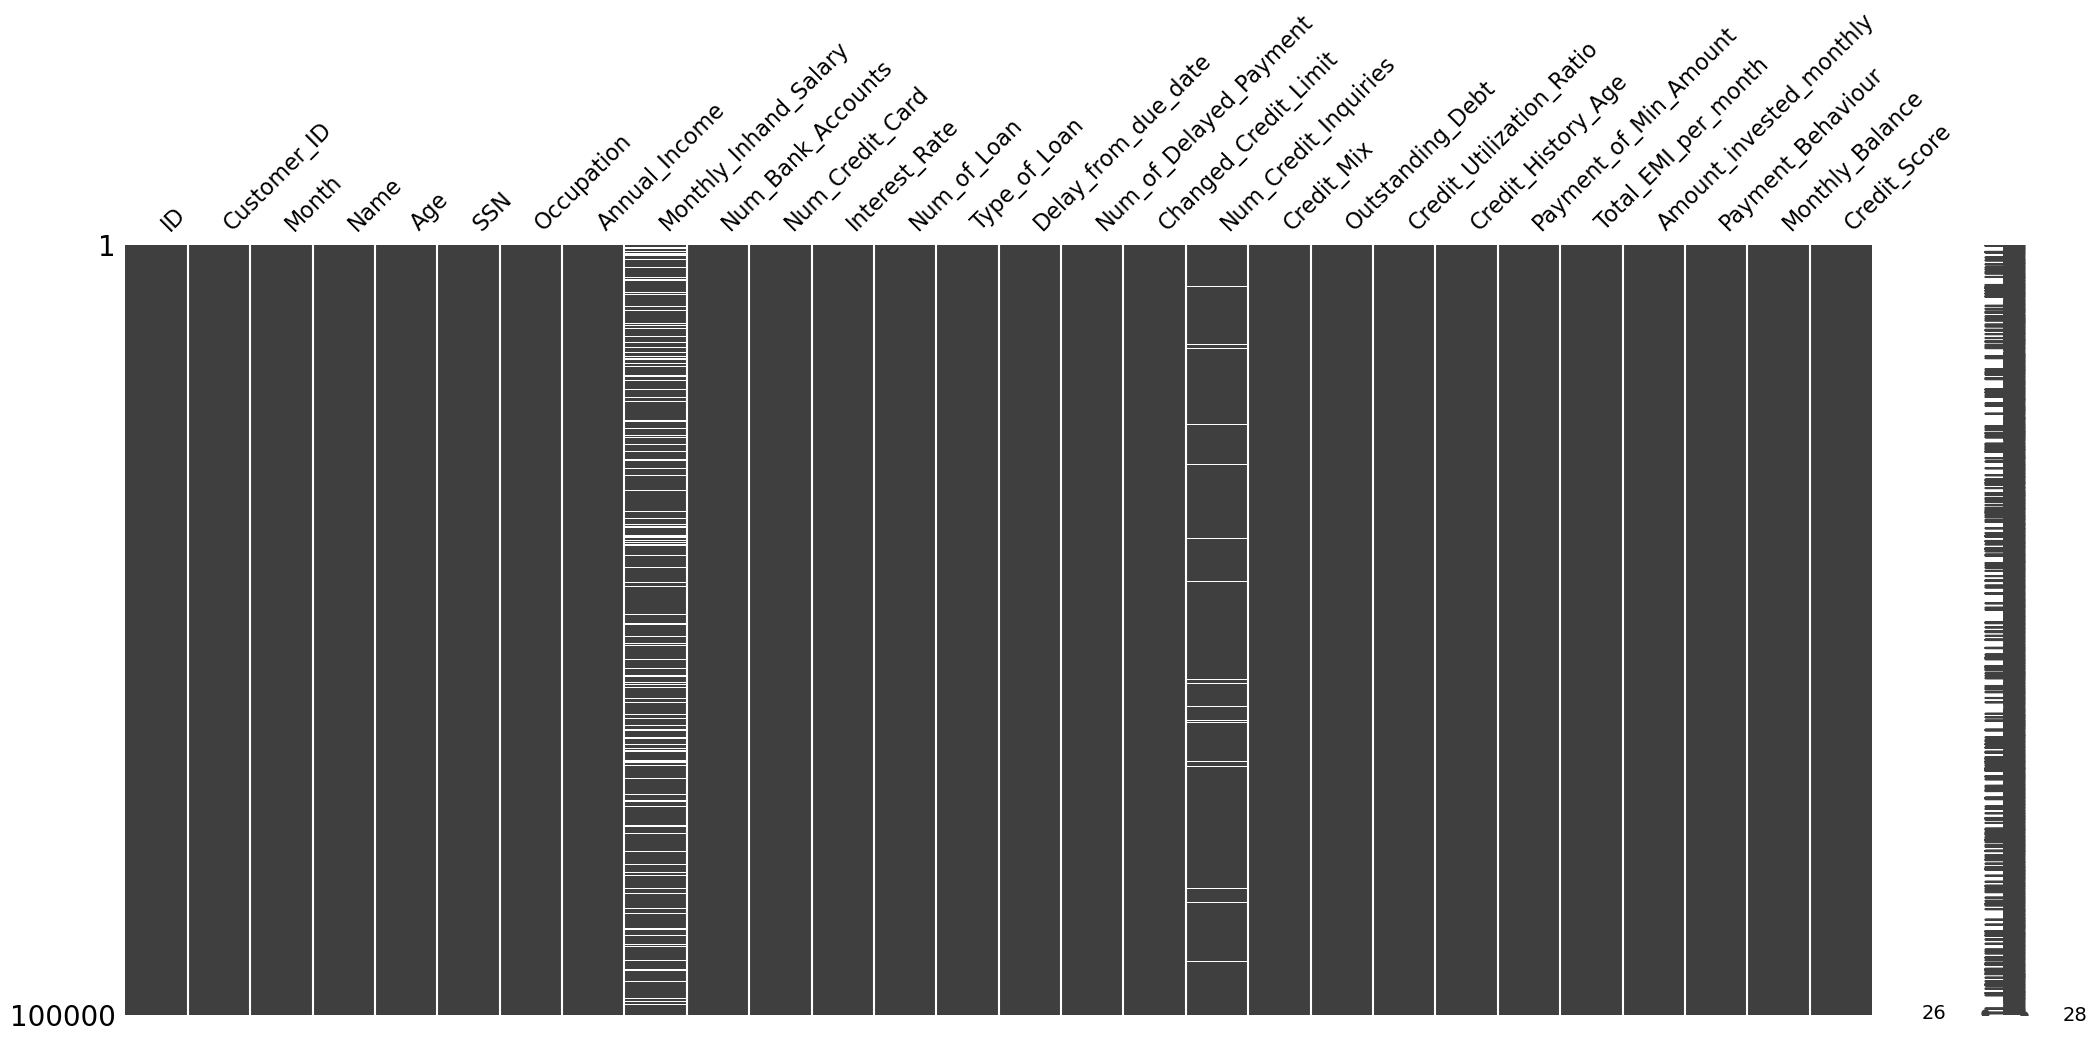

In [13]:
msno.matrix(df)

## If msno throws an error saying "Cannot find gridb",...
## Please get into missigno package, correct the grid(b=False) to grid(visible=False)

By observing, we can confirm that the missing values are scattered in data rather than clustered at the same place

In [14]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.768580,10.389784,27.754251,1426.220376,32.285173,1403.118217,636.932570,-3.000000e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,225.403321,6.790119,193.177339,1155.129026,5.116875,8306.041270,2041.827136,3.162151e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.052567,30.306660,74.616863,2.667327e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.959898,3.340313e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,1945.962500,36.496663,161.224249,266.118215,4.672590e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


By seeing the min, max value and comparing it to the mean value, we can see the outliers present in the data and will  be taken care in feature extraction process

In [15]:
df.describe(include = object)

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,99999,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6260,3,404,3,6,3
top,0x1602,CUS_0xd40,January,Jessicad,394-01-9302,Lawyer,Not Specified,Standard,19 Years and 5 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12500,49,11,7097,1568,45820,498,52326,27593,53174


From the above statsitics, we confirm that every record in customer's ID is unique. Also, each customer's data have eight different months. These are subcategorised in columns like occupation, type of loan, payment behaviour, credit mix.

In type of loan feature, most frequently occuring value is 'Not Specified'

##### 2.3 Feature Analysis

_2.3.1 Categorical variable - Occupation_

In [16]:
occupation_count = df['Occupation'].value_counts(dropna = False)
# occupation_count
occupation_count_sorted = occupation_count.sort_values(ascending=False)
occupation_count_sorted

Occupation
Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: count, dtype: int64

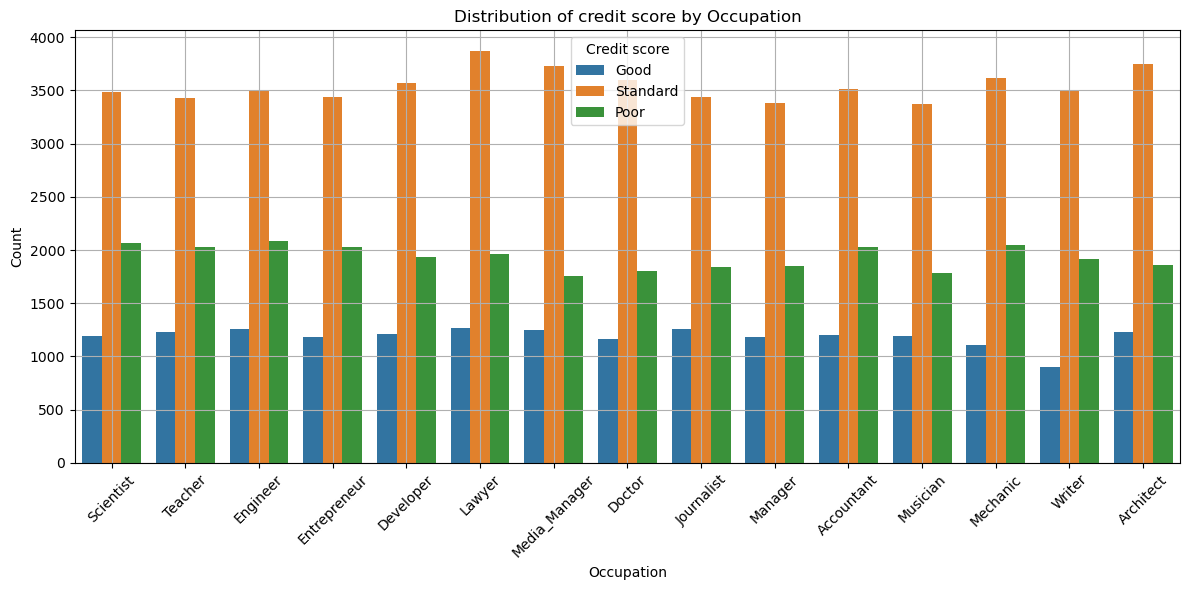

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of credit score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit score')
plt.grid(True)
plt.tight_layout()
plt.show()

The lawyer has the most of the customer's occupation is lawyer in the dataframe and most people have the standard credit score.

_2.3.2 Categorical variable - Type of loan_

In [18]:
type_of_loan_count = df['Type_of_Loan'].value_counts(dropna = False)
# type_of_loan_count

In [19]:
index_values = ~df['Type_of_Loan'].isna().values
loan_type_data = list(df['Type_of_Loan'][index_values])
# loan_type_data

In [20]:
# Create a dictionary to store the counts as some customers has 
# multiple type of loans

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values :
        loan_type = each_value.strip(' ')
        if 'and' in loan_type :
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict : 
            loan_type_dict[loan_type] += 1
        else :
            loan_type_dict[loan_type] = 1

# loan_type_dict

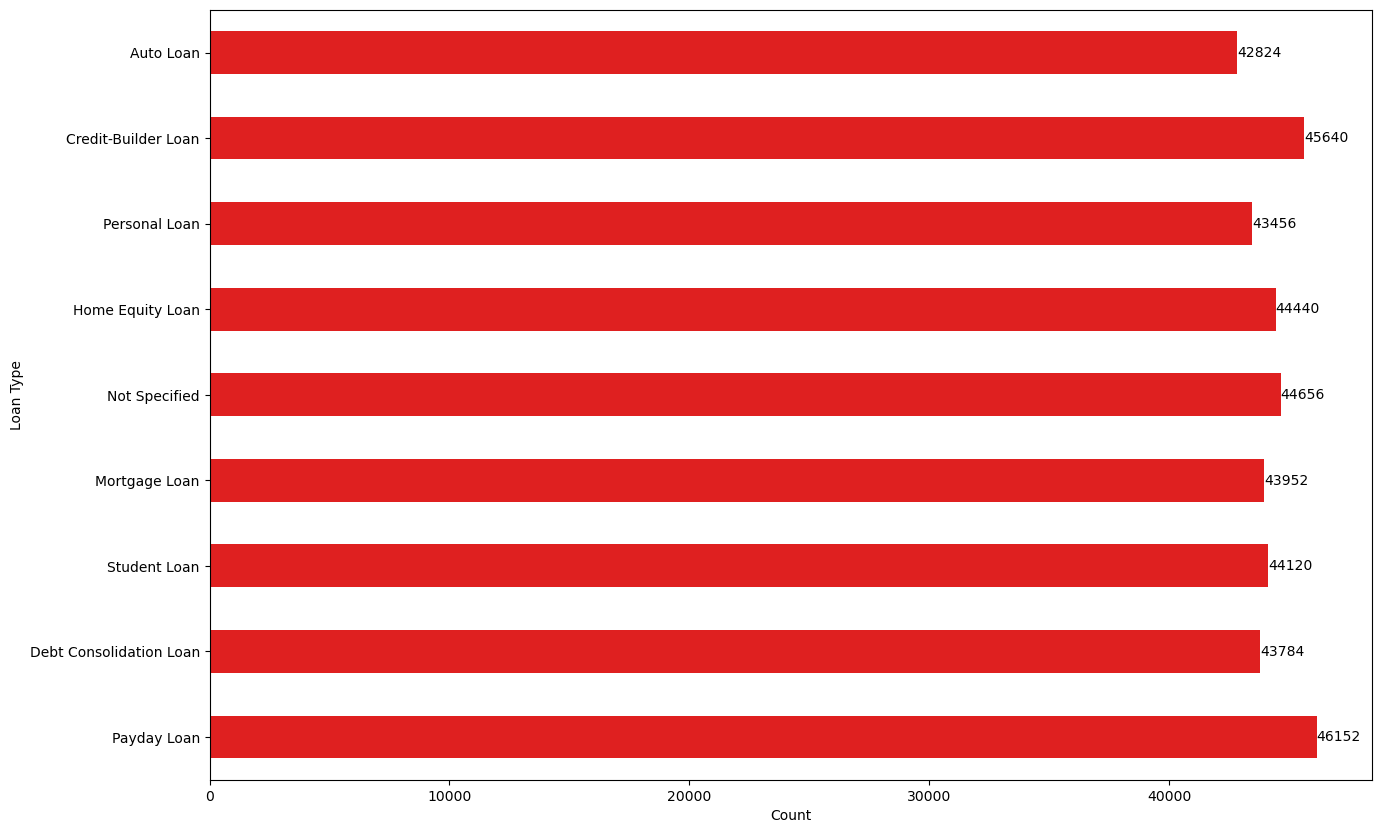

In [21]:
# Displaying the plot on the type of loans

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming loan_type_dict is already defined

# Create a horizontal bar plot with reduced spacing between bars
sns.barplot(y=list(loan_type_dict.keys()), 
            x=list(loan_type_dict.values()), color="r", width=0.5)

# Add value annotations
for index, value in enumerate(loan_type_dict.values()):
    plt.text(value, index, str(value), ha='left', va='center')

# Set labels
plt.xlabel('Count')
plt.ylabel('Loan Type')

# Show the plot
plt.show()

By seeing the above plots, we can confirm that the Credit-Builder loans and Payday loans are the highest occurences among all other loans.

_2.3.3 Categorical variable - Credit mix_

In [22]:
# Value counts of the column - Credit_Mix

credit_mix_count = df['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Credit_Mix
Standard    45820
Good        30351
Bad         23828
NaN             1
Name: count, dtype: int64

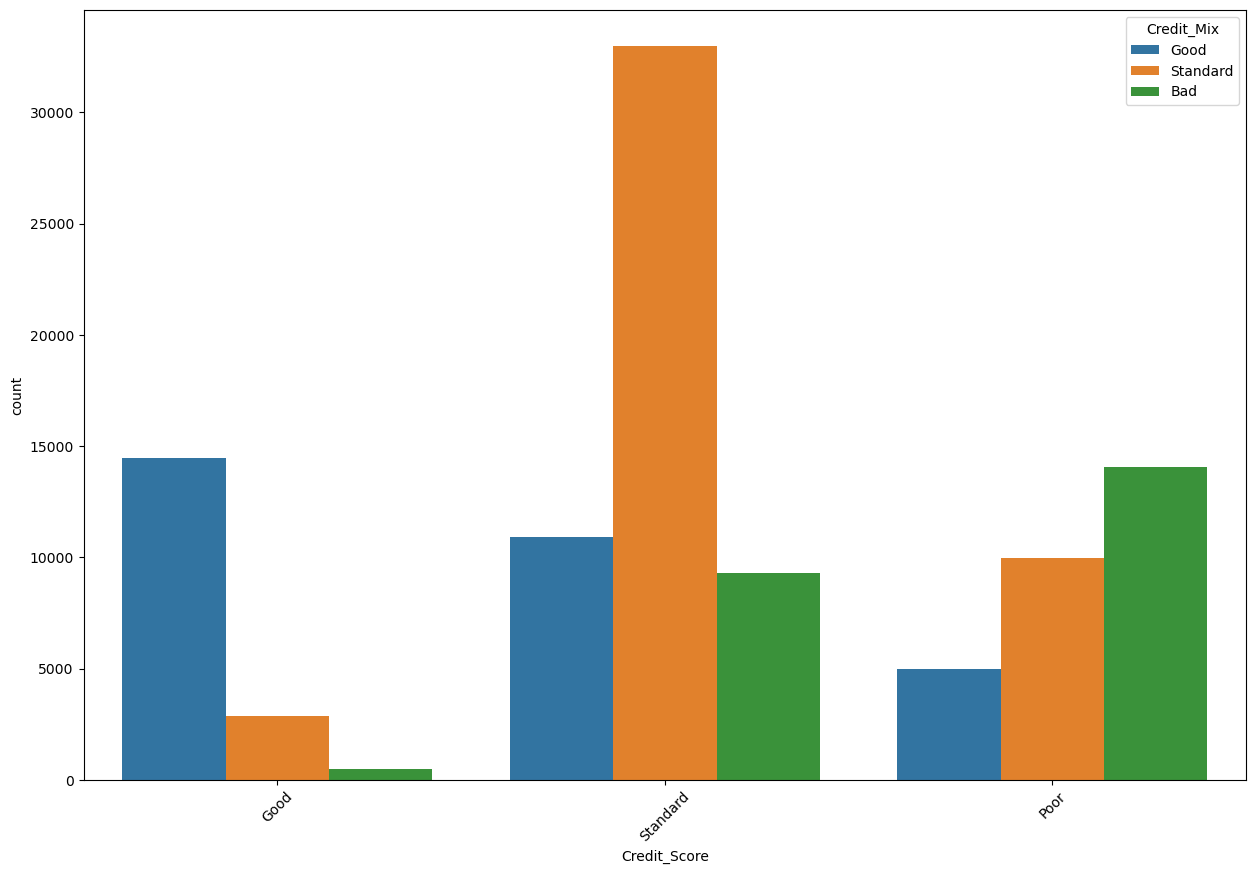

In [23]:
sns.countplot(x='Credit_Score', hue='Credit_Mix', data=df)
plt.xticks(rotation=45)
plt.show()

We can conclude credit_mix is similar to credit_score. So, the credit score depends on the credit mix the customers have.

_2.3.4 Categorical variable - Payment of min amt_

In [24]:
# Value counts of the column - Payment of min amt

min_amt_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amt_count 

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

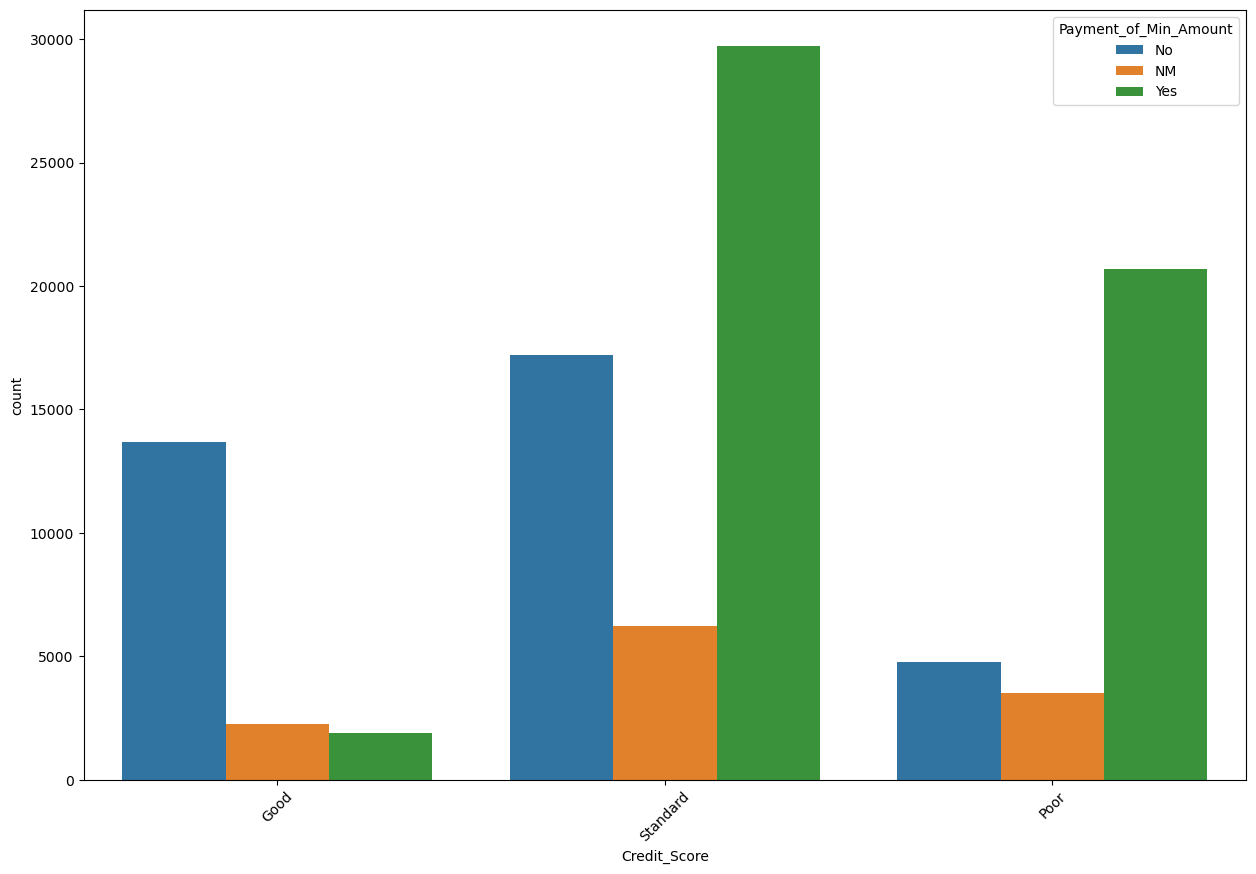

In [25]:
sns.countplot(x='Credit_Score', hue='Payment_of_Min_Amount', data=df)
plt.xticks(rotation=45)
plt.show()

So, most customers must pay a minimum amount. However, customers with a good credit score did not pay the minimum amount. Alternatively, customers with poor credit paid the minimum amount.

_2.3.5 Numerical variable - Age_

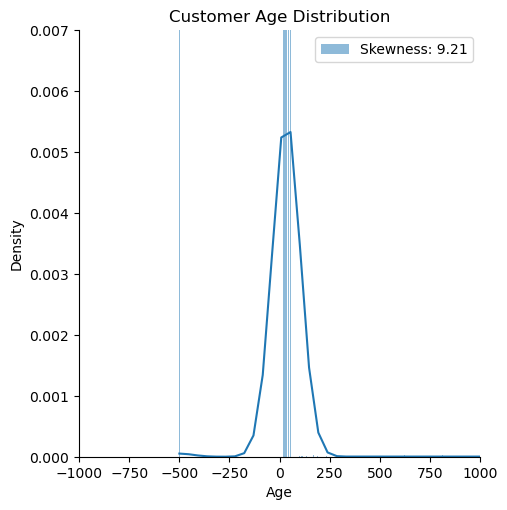

In [26]:
sns.displot(df['Age'], stat="density",  kde=True,
             label='Skewness: %.2f' % (df['Age'].skew()))
plt.legend(loc = 'best')
plt.xlim(-1000, 1000)
plt.ylim(0, 0.007)
plt.title('Customer Age Distribution')
plt.show()

From the above graph, it can be concluded the feature has outliers and a high degree of skewness

_2.3.6 Numerical variable - Monthly_Inhand_Salary_

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

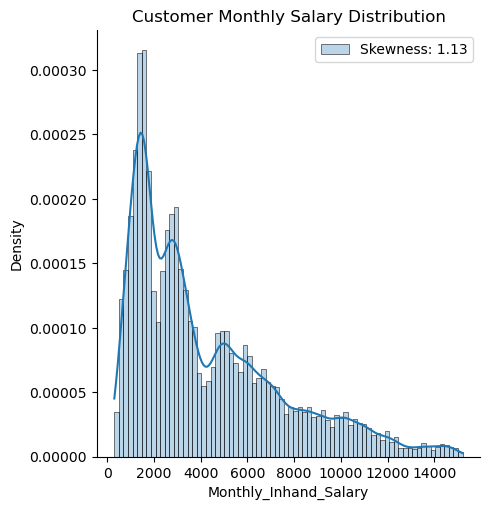

In [27]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.displot(df['Monthly_Inhand_Salary'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

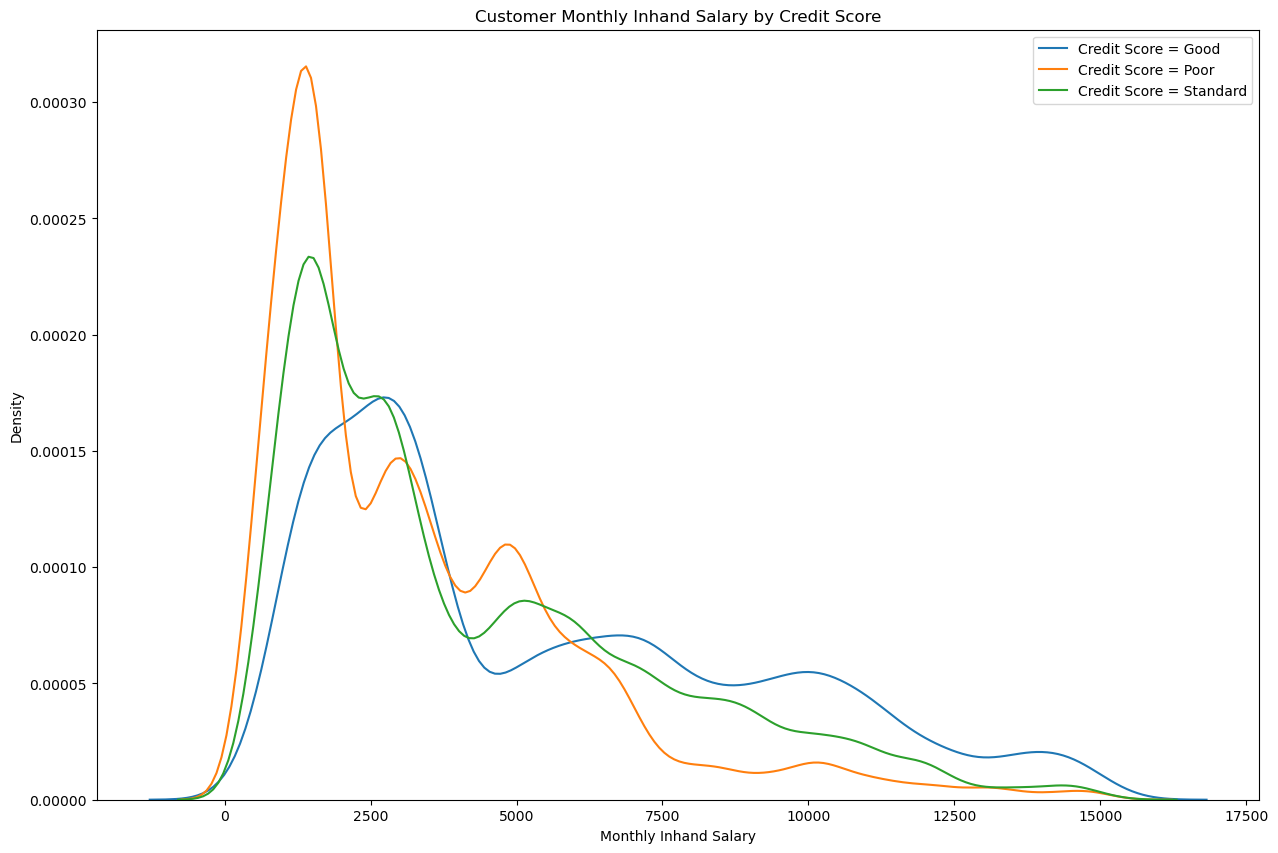

In [28]:
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Good'],
             label = 'Credit Score = Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Poor'], 
            label = 'Credit Score = Poor')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Standard'],
             label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

The monthly inhand salary is slightly skewed. Also, the above graph shows that customers with poor credit score have a low monthly inhand salary compared to customers with standard and good credit score.

_2.3.6 Numerical variable - Outstanding_Debt_

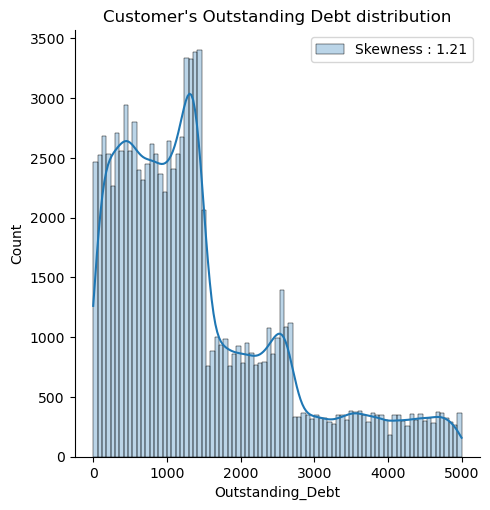

In [29]:
sns.displot(df['Outstanding_Debt'],alpha=0.3, kde = 'True', 
               label = 'Skewness : %.2f'%(df['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt distribution")
plt.show()

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

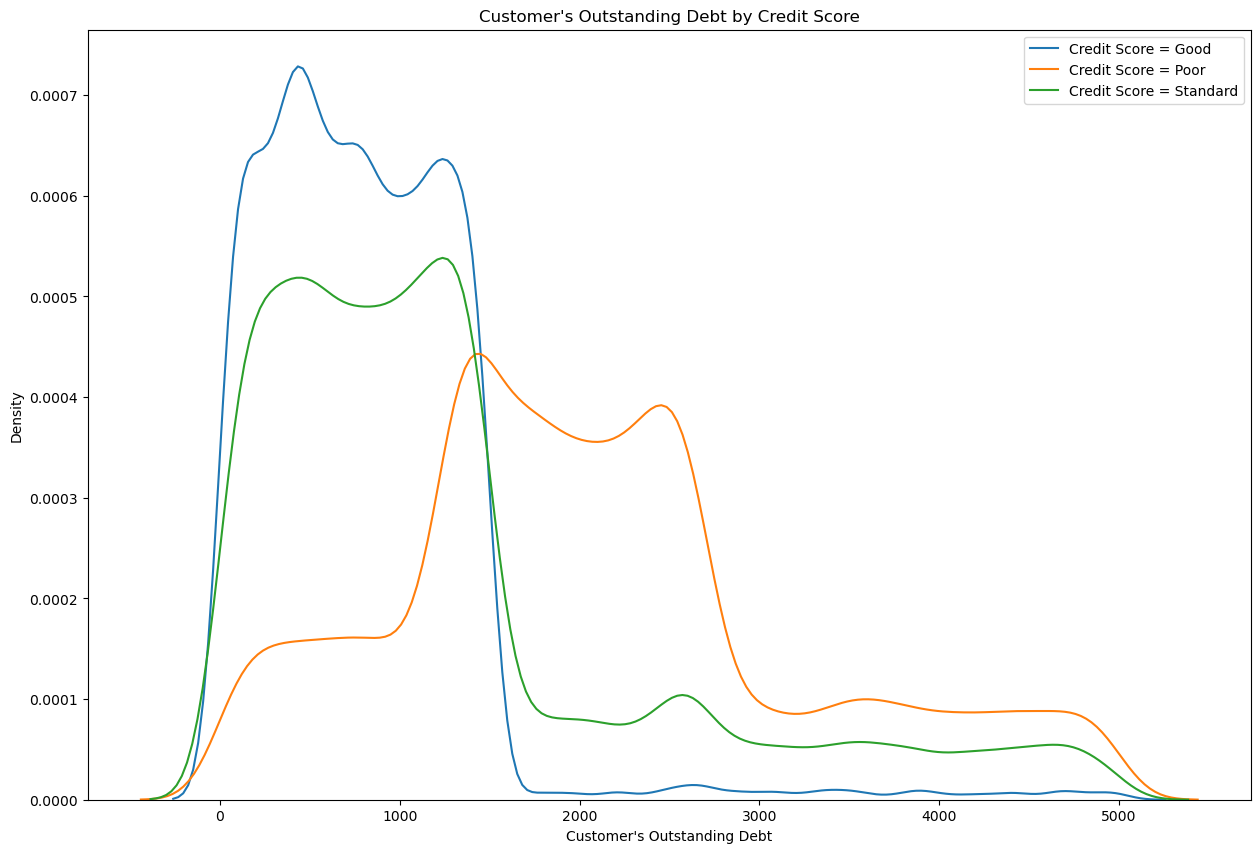

In [30]:
# Outstanding debt segregated by credit score

sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Good'], 
            label = 'Credit Score = Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Poor'],
            label = 'Credit Score = Poor')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Standard'],
            label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

So, most customers have low outstanding debt. However, the customers with Good credit score have very low outstanding debt than compared to standard and pooer credit score

##### 2.4 Data Processing
It is the process of getting our dataset ready for model training. In this section, the following steps will be performed :
* Detecting and removing outliers
* Drop and fill missing values
* Feature engineering
* Data transformation
* Feature encoding

_2.4.1 Detect and remove outliers in numerical variables_

Outliers are the points in the data which have extreme values and they do not confirm with the majority of the data. These data points also skew the data towards extremes and can cause inaccurate model predictions. 

In [31]:
numerical_columns = list(df.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


Cutting at ±1.5IQR is somewhat comparable to cutting slightly below ±3σ in a normal distribution. This threshold declares about 1% of measurements as outliers, which aligns with the common practice of using "3σ" as a bound in statistical tests.

In [32]:
def tukey_method(df, n, feature_list):
    outlier_indices = []
    for feature in feature_list :
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1

        outlier_r = 1.5 * IQR
        outlier_list = df[(df[feature] < Q1 - outlier_r) | 
                          (df[feature] > Q3 + outlier_r)].index
        # .index gives the row positon and saved in the oulier list
        outlier_indices.extend(outlier_list)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, 
                                value in outlier_indices.items()
                                if value > n)
    return multiple_outliers

In [33]:
outliers = tukey_method(df, 2, numerical_columns)
print(len(outliers))

1747


In [34]:
df.iloc[outliers, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
920,0x1b66,CUS_0x7caf,January,Rl,3169.0,628-85-7991,Architect,147499.600,12353.633333,2,2,12,2.0,"Payday Loan, and Debt Consolidation Loan",14,3.0,4.21,1.0,Good,1250.67,42.252980,20 Years and 3 Months,No,192.206483,10000.000000,High_spent_Small_value_payments,1041.077483,Standard
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,7,34,6.0,"Home Equity Loan, Mortgage Loan, Credit-Builde...",61,14.0,13.26,11.0,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,High_spent_Small_value_payments,269.053164,Good
1656,0x1fb6,CUS_0x8208,January,Jonathan Spicers,-500.0,084-02-0981,Teacher,94454.100,8102.175000,1,4,5,-100.0,"Credit-Builder Loan, Home Equity Loan, and Hom...",4,6.0,1.63,4.0,Good,1342.61,26.063001,29 Years and 9 Months,NM,152.506895,10000.000000,High_spent_Medium_value_payments,719.685063,Good
2459,0x2469,CUS_0x86b,April,Paulr,-500.0,372-37-8955,Engineer,69692.160,6034.680000,9,5,32,7.0,"Personal Loan, Personal Loan, Auto Loan, Debt ...",15,21.0,14.66,9.0,Bad,2128.87,26.751249,13 Years and 0 Months,Yes,395.879393,10000.000000,High_spent_Medium_value_payments,258.130618,Poor
2902,0x2700,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,8,17,6.0,"Auto Loan, Payday Loan, Credit-Builder Loan, D...",15,16.0,27.33,12.0,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80196,0x1ebe6,CUS_0x6be3,May,Anns,47.0,037-33-2929,Doctor,147848.640,12274.720000,0,4,3,3.0,"Debt Consolidation Loan, Home Equity Loan, and...",2,0.0,2.16,1.0,Good,731.37,24.593712,29 Years and 8 Months,NM,363.866397,1150.798370,Low_spent_Large_value_payments,789.095469,Good
80365,0x1ece3,CUS_0x8c11,June,Vrinda Manochao,32.0,732-73-6522,Lawyer,120017.120,9763.426667,3,4,10,1.0,Student Loan,18,14.0,6.94,0.0,Standard,945.27,33.503672,27 Years and 6 Months,Yes,27895.000000,593.439107,High_spent_Large_value_payments,1021.278656,Good
81588,0x1f40e,CUS_0xacf7,May,Viswanathay,51.0,918-95-7408,Mechanic,142544.360,NaN,0,4,3,0.0,"Auto Loan, Home Equity Loan, Home Equity Loan,...",2,4.0,4.45,1.0,Good,855.55,30.085064,18 Years and 8 Months,No,726.088356,626.503282,Low_spent_Medium_value_payments,862.166385,Standard
86022,0x20e08,CUS_0xbc71,July,Jonathan Str,44.0,792-12-2499,Musician,119242.680,9849.890000,8,3,7,1.0,Debt Consolidation Loan,17,10.0,1.54,1.0,Standard,746.75,41.117821,20 Years and 8 Months,Yes,61710.000000,10000.000000,High_spent_Large_value_payments,1073.522528,Poor


In [35]:
# Before
print("Before : {} rows".format(len(df)))

# After
df = df.drop(outliers, axis = 0).reset_index(drop = True)
print("After :  {} rows".format(len(df)))

Before : 100000 rows
After :  98253 rows


In [36]:
df.isna().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       14741
Num_Credit_Inquiries         1924
Credit_Mix                      1
ID                              0
Num_of_Delayed_Payment          0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Delay_from_due_date             0
Customer_ID                     0
Type_of_Loan                    0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Name                            0
Month                           0
Credit_Score                    0
dtype: int64

In [37]:
df.drop('Num_of_Loan',axis=1,inplace=True)  
#Type_of_Loan and Num_of_Loan are reduntant columns, 
# so we decide to drop Num_of_Loan column

df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,7.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98248,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,214.614934,Poor
98249,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,214.614934,Poor
98250,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,214.614934,Poor
98251,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",20,6.0,11.50,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,214.614934,Standard


_2.4.2 Filling missing values_

    * Mean imputation can be used when the distribution of the data is normal, and the missing values are random. 
    * Median imputation is appropriate when the distribution of the data is skewed. 
    * Mode imputation is used when dealing with categorical data, where the mode represents the most common category.

* _Monthly inhand salary_

In [38]:
# Finding mu for the feature Monthly salary by classifying to credit score

monthly_salary_good_mu = np.mean(df[df['Credit_Score'] == 'Good']
                                 ['Monthly_Inhand_Salary'])
monthly_salary_poor_mu = np.mean(df[df['Credit_Score'] == 'Poor']
                                 ['Monthly_Inhand_Salary'])
monthly_salary_standard_mu = np.mean(df[df['Credit_Score'] == 'Standard']
                                 ['Monthly_Inhand_Salary'])

(monthly_salary_good_mu, monthly_salary_poor_mu, monthly_salary_standard_mu)

(5197.345442090105, 3309.7796610166083, 4172.582992883795)

In [39]:
# Detect the index of the rows where the feautre is null

index_val = list(df['Monthly_Inhand_Salary'].isna())
# index_val

In [40]:
# Replacing the missing values with the mean

for index in range(len(df)):
    if index_val[index]:
        if df['Credit_Score'][index] == 'Good':
            df['Monthly_Inhand_Salary'][index] = monthly_salary_good_mu
        
        elif df['Credit_Score'][index] == 'Poor':
            df['Monthly_Inhand_Salary'][index] = monthly_salary_poor_mu
        
        else : 
            df['Monthly_Inhand_Salary'][index] = monthly_salary_standard_mu

In [41]:
# Replacing invalid salary values with null 

new_lst = [abs(int(i)) for i in df['Monthly_Inhand_Salary'].tolist()]
rem_neg_val = [i if i > 0 else np.nan for i in new_lst]
df['Monthly_Inhand_Salary'] = rem_neg_val

df['Monthly_Inhand_Salary'].replace(np.nan, 0, inplace = True)

In [42]:
# Check for missing values

df['Monthly_Inhand_Salary'].isna().sum()

0

* _Num_Credit_Inquiries_

In [43]:
# Finding the median and replacing the values with median

inquiry_index = list(~df['Num_Credit_Inquiries'].isna())
inquiry_median = np.median(df['Num_Credit_Inquiries'].loc[inquiry_index])
inquiry_median

df['Num_Credit_Inquiries'].fillna(inquiry_median, inplace = True)

In [44]:
# Check for missing values

df['Num_Credit_Inquiries'].isna().sum()

0

* _Credit_Mix_

In [45]:
# Calculate median for Credit_Mix with respect to Credit_Score

good_mode = (df[df['Credit_Score'] == 'Good']['Credit_Mix']).mode()
poor_mode = (df[df['Credit_Score'] == 'Poor']['Credit_Mix']).mode()
std_mode = (df[df['Credit_Score'] == 'Standard']['Credit_Mix']).mode()

good_mode, poor_mode, std_mode

(0    Good
 Name: Credit_Mix, dtype: object,
 0    Bad
 Name: Credit_Mix, dtype: object,
 0    Standard
 Name: Credit_Mix, dtype: object)

In [46]:
# Index of rows where the feauture is null

index_val = list(df['Credit_Mix'].isna())

In [47]:
# Replace the missing values

for index in range(len(df)):
    if index_val[index]:
        if df['Credit_Score'][index] == 'Good' : 
            df['Credit_Mix'][index] = 'Good'
        elif df['Credit_Score'][index] == 'Poor' :
            df['Credit_Mix'][index] = 'Bad'
        else :
            df['Credit_Mix'][index] = 'Standard'

In [48]:
# Check for missing values

df['Credit_Mix'].isna().sum()

0

We replaced all the missing values in the Monthly_inhand_salary, Num_Credit_Inquiries and Credit_mix

In [49]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

* _Statistical Analysis_

`Chi-Square Test for Independence`

The test is used to check whether the categorical variables are independent or not.

$H_0$ : The variables are independent
$H_1$ : The variables are dependent

*(Assuming the level of confidence as 95%)*

**Categorical features**

In [50]:
# Select categorical features
df_cat = df.select_dtypes(include = object)

# Selecting features
df_cat_feat = df_cat.drop('Credit_Score', axis = 1)

# Target feature
df_target = df_cat['Credit_Score']

In [51]:
for i in df_cat_feat :

    print('Feature :', i)
    print('The null and alternative hypothesis is')
    print(' ')
    print('H0 : {} and loan_status are independent'.format(i))
    print('H0 : {} and loan_status are dependent'.format(i))
    print(' ')

    # Table of category_features and target
    table = pd.crosstab(df_cat_feat[i], df_target)
    obs_value = table.values

    # Applying Chi-square test to test independence
    # 'correction = False' means Yates' correction is not applied
    t_stat, p, dof, exp_value = chi2_contingency(observed = obs_value, 
                                    correction = False)
    
    print("Test statistic :", t_stat)
    print("p-values : ", p)

    if p > 0.05 :
        print('{} and Credit_Score are independent'.format(i))
    else :
        print('{} and Credit_Score are dependent'.format(i))

    print('__'*30)
    print()

Feature : Month
The null and alternative hypothesis is
 
H0 : Month and loan_status are independent
H0 : Month and loan_status are dependent
 
Test statistic : 201.92565857511812
p-values :  2.2200471602518325e-35
Month and Credit_Score are dependent
____________________________________________________________

Feature : Occupation
The null and alternative hypothesis is
 
H0 : Occupation and loan_status are independent
H0 : Occupation and loan_status are dependent
 
Test statistic : 179.80924678296174
p-values :  4.2335804037802284e-24
Occupation and Credit_Score are dependent
____________________________________________________________

Feature : Type_of_Loan
The null and alternative hypothesis is
 
H0 : Type_of_Loan and loan_status are independent
H0 : Type_of_Loan and loan_status are dependent
 
Test statistic : 65148.473364788806
p-values :  0.0
Type_of_Loan and Credit_Score are dependent
____________________________________________________________

Feature : Credit_Mix
The null an

**Numerical features**

In [52]:
df_num = df.select_dtypes(exclude = object)

`Shapiro-Wilk test`

This test tests that the data was drawn from a normal distribution or not.

$H_0$ : The data is normally distributed.
$H_1$ : The data is not normally distributed.

*(Assuming the level of confidence as 95%)*

In [53]:
for i in df_num.columns :
    print('Feature :', i)
    print(shapiro(df[i]), '\n')
    print('__' * 30)

Feature : Age
ShapiroResult(statistic=0.1141200065612793, pvalue=0.0) 

____________________________________________________________
Feature : Annual_Income
ShapiroResult(statistic=0.07074087858200073, pvalue=0.0) 

____________________________________________________________
Feature : Monthly_Inhand_Salary
ShapiroResult(statistic=0.9000874161720276, pvalue=0.0) 

____________________________________________________________
Feature : Num_Bank_Accounts
ShapiroResult(statistic=0.08242279291152954, pvalue=0.0) 

____________________________________________________________
Feature : Num_Credit_Card
ShapiroResult(statistic=0.11611080169677734, pvalue=0.0) 

____________________________________________________________
Feature : Interest_Rate
ShapiroResult(statistic=0.1097525954246521, pvalue=0.0) 

____________________________________________________________
Feature : Delay_from_due_date
ShapiroResult(statistic=0.9219305515289307, pvalue=0.0) 

_______________________________________________

`Kruskal-Wallis test`

This test used to test for independence when the data is not normally distributed

$H_0$ : The data samples are with equal central tendancy(independent)
$H_1$ : The data samples are not with equal central tendancy(dependent)

*(Assuming the level of confidence as 95%)*

In [54]:
for i in df_num.columns :

    print('Feature: ',i)
    print('The null and alternative hypothesis is :')
    print(' ')
    print('H0 : The variables {} and loan status are independent'.format(i))
    print('H1 : The variables {} and loan status are dependent'.format(i))
    print('')

    # Segregating the numerical columns based on credit score
    poor = df[df['Credit_Score'] == 'Poor'][i]
    std = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]

    # Calculating the rank sum for each categories
    t_stat, p = kruskal(poor, std, good)

    print("Test statisitc :", t_stat)
    print("p-value:", p)

    if p > 0.05 :
        print('{} and Credit Score are independent'.format(i))
    else :
        print('{} and Credit Score are dependent'.format(i))
    print('___' * 25)
    print()

Feature:  Age
The null and alternative hypothesis is :
 
H0 : The variables Age and loan status are independent
H1 : The variables Age and loan status are dependent

Test statisitc : 1995.199023293422
p-value: 0.0
Age and Credit Score are dependent
___________________________________________________________________________

Feature:  Annual_Income
The null and alternative hypothesis is :
 
H0 : The variables Annual_Income and loan status are independent
H1 : The variables Annual_Income and loan status are dependent

Test statisitc : 3932.8950042371443
p-value: 0.0
Annual_Income and Credit Score are dependent
___________________________________________________________________________

Feature:  Monthly_Inhand_Salary
The null and alternative hypothesis is :
 
H0 : The variables Monthly_Inhand_Salary and loan status are independent
H1 : The variables Monthly_Inhand_Salary and loan status are dependent

Test statisitc : 4615.273496661653
p-value: 0.0
Monthly_Inhand_Salary and Credit Score 

In [55]:
print('The dependent numerical variable found after K-test Test:')
print('')
for i in df_num.columns:
    poor = df[df['Credit_Score'] == 'Poor'][i]
    standard = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]
    
    test_stat, p = kruskal(poor,standard,good)

    if p < 0.05:
        print(i)

The dependent numerical variable found after K-test Test:

Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance


In [56]:
print('The independent numerical variable found after K-test Test:')
print('')
for i in df_num.columns:
    poor = df[df['Credit_Score'] == 'Poor'][i]
    standard = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]
    
    test_stat, p = kruskal(poor,standard,good)

    if p > 0.05:
        print(i)

The independent numerical variable found after K-test Test:



_2.4.3 Feature engineering_

The process of creating new features from existing ones to better represent the underlying problem. Also, these features, improve the model accuracy.

In [57]:
# Creating list for each loan type and feature encoding it
loan_type_dict

{'Auto Loan': 42824,
 'Credit-Builder Loan': 45640,
 'Personal Loan': 43456,
 'Home Equity Loan': 44440,
 'Not Specified': 44656,
 'Mortgage Loan': 43952,
 'Student Loan': 44120,
 'Debt Consolidation Loan': 43784,
 'Payday Loan': 46152}

In [58]:
# List creation
Auto_loan =               [0] *(len(df))
Credit_builder_loan =     [0] *(len(df))
Personal_loan =           [0] *(len(df))
Home_equity_loan =        [0] *(len(df))
Mortgage_loan =           [0] *(len(df))
Student_loan =            [0] *(len(df))
Debt_consolidation_loan = [0] *(len(df))
Payday_loan =             [0] *(len(df))

In [59]:
# Feature encoding for every customer for their particular loan

for i2 in range(len(df)):
    # print(i2)

    # Auto loan
    if 'Auto' in loan_type_data[i2]:
        Auto_loan[i2] = 1

    # Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[i2]:
        Credit_builder_loan[i2] = 1

    # Personal Loan
    if 'Personal' in loan_type_data[i2]:
        Personal_loan[i2] = 1
    
    # Home Equity Loan
    if 'Home' in loan_type_data[i2]:
        Home_equity_loan[i2] = 1
    
    # Mortgage Loan
    if 'Mortgage' in loan_type_data[i2]:
        Mortgage_loan[i2] = 1
    
    ### For Student Loan
    if 'Student' in loan_type_data[i2]:
        Student_loan[i2] = 1
        
    ### For Debt Consolidation loan
    if 'Debt' in loan_type_data[i2]:
        Debt_consolidation_loan[i2] = 1
    
    ### For Payday loan
    if 'Payday' in loan_type_data[i2]:
        Payday_loan[i2] = 1
    

In [60]:
# Adding the new columns to the dataset

df['Auto_Loan'] = Auto_loan
df['Credit_Builder_Loan'] = Credit_builder_loan
df['Personal_Loan'] = Personal_loan
df['Home_Enquity_Loan'] = Home_equity_loan
df['Mortgage_Loan'] = Mortgage_loan
df['Student_Loan'] = Student_loan
df['Debt_Consolidation_Loan'] = Debt_consolidation_loan
df['Payday_Loan'] = Payday_loan

In [61]:
### Removing the column - Type_of_loan

df.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [62]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,January,23.0,Scientist,19114.12,1824,3,4,3,3,7.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,1,1,0,0,0,0
1,February,23.0,Scientist,19114.12,5197,3,4,3,-1,7.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,1,1,0,0,0,0
2,March,-500.0,Scientist,19114.12,5197,3,4,3,3,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,1,1,0,0,0,0
3,April,23.0,Scientist,19114.12,5197,3,4,3,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,1,1,0,0,0,0
4,May,23.0,Scientist,19114.12,1824,3,4,3,6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98248,April,25.0,Mechanic,39628.99,3359,4,6,7,23,7.0,11.50,3.0,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,214.614934,Poor,0,1,0,1,1,1,1,1
98249,May,25.0,Mechanic,39628.99,3359,4,6,7,18,7.0,11.50,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,214.614934,Poor,0,1,0,1,1,1,1,1
98250,June,25.0,Mechanic,39628.99,3359,4,6,5729,27,6.0,11.50,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,214.614934,Poor,0,1,0,1,1,1,1,1
98251,July,25.0,Mechanic,39628.99,3359,4,6,7,20,6.0,11.50,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,214.614934,Standard,0,1,0,1,1,1,1,1


_2.4.4 Data transformation_

In [63]:
numeric_df = df.select_dtypes(include=['int', 'float'])

In [64]:
numeric_df.skew()

Age                           9.500203
Annual_Income                12.893865
Monthly_Inhand_Salary         1.166514
Num_Bank_Accounts            11.633358
Num_Credit_Card               8.818858
Interest_Rate                 9.300195
Delay_from_due_date           0.961513
Num_of_Delayed_Payment       15.024102
Changed_Credit_Limit          0.630001
Num_Credit_Inquiries          9.888119
Outstanding_Debt              1.202688
Credit_Utilization_Ratio      0.024936
Total_EMI_per_month           7.318387
Amount_invested_monthly       4.457198
Monthly_Balance            -104.471687
Auto_Loan                     0.656370
Credit_Builder_Loan           0.583990
Personal_Loan                 0.636711
Home_Enquity_Loan             0.600246
Mortgage_Loan                 0.610647
Student_Loan                  0.627459
Debt_Consolidation_Loan       0.627459
Payday_Loan                   0.567841
dtype: float64

From the above dataset, we can observe the skewness fo the data in numeirical columns. Therefore, we apply **log transformation** to remove skewness for the following features :

    Age
    Annual income
    Monthly salary
    Interest rate
    Num of delayed payments
    Num credit inquiries
    Total EMI
    Amt invested monthly
    Monthly balance

    Age

Text(0.5, 1.0, 'Customer Age Distribution')

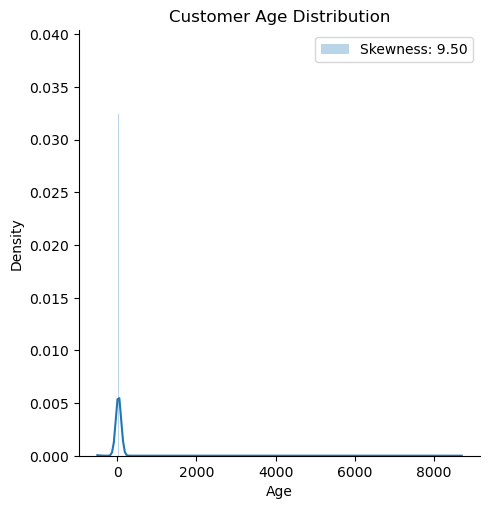

In [65]:
sns.displot(df['Age'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

In [66]:
mod_age = [np.log(age) if age > 0 else 0 
           for age in df['Age']]
df['Age'] = mod_age

Text(0.5, 1.0, 'Customer Age Distribution')

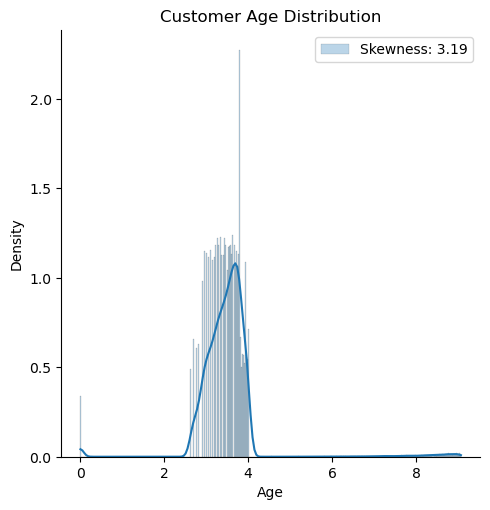

In [67]:
sns.displot(df['Age'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

    Annual_Income

Text(0.5, 1.0, 'Customer Annual Income Distribution')

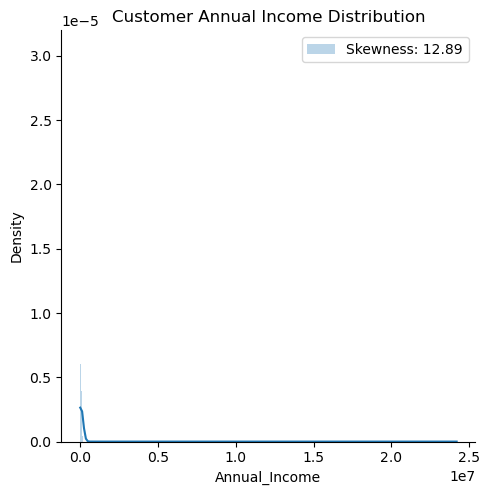

In [68]:
sns.displot(df['Annual_Income'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Annual_Income'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Annual Income Distribution')

In [69]:
mod_annual_income = [np.log(amt) if amt > 0 else 0 
                     for amt in df['Annual_Income']]
df['Annual_Income'] = mod_annual_income

Text(0.5, 1.0, 'Customer Annual Income Distribution')

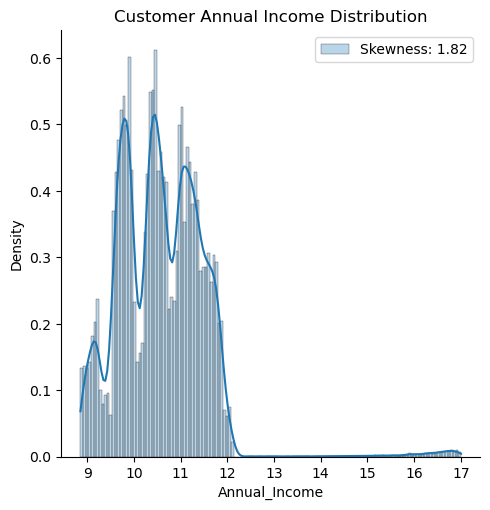

In [70]:
sns.displot(df['Annual_Income'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Annual_Income'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Annual Income Distribution')

    Interest_rate

Text(0.5, 1.0, 'Interest Rate Distribution')

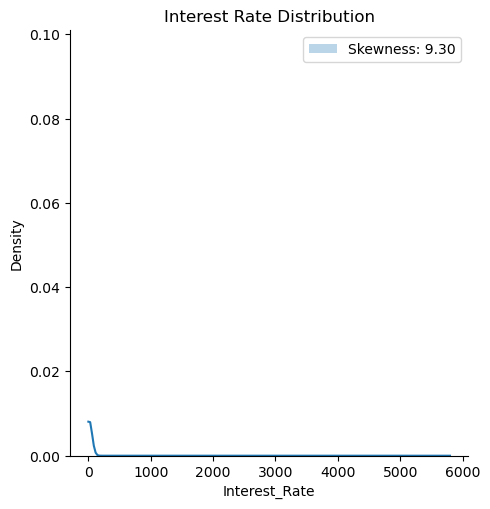

In [71]:
sns.displot(df['Interest_Rate'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

In [72]:
mod_interest = [np.log(interest) if interest > 0 else 0
                for interest in df['Interest_Rate']]
df['Interest_Rate'] = mod_interest

Text(0.5, 1.0, 'Interest Rate Distribution')

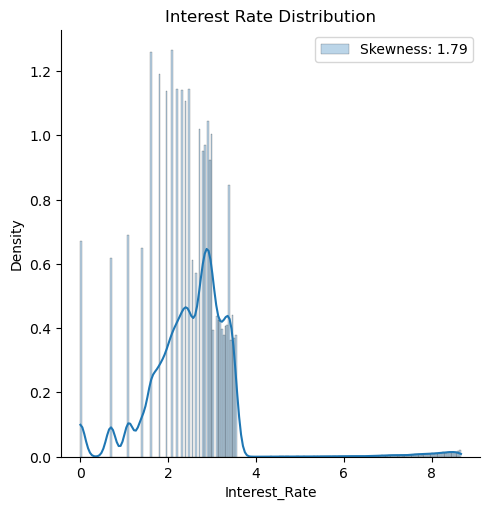

In [73]:
sns.displot(df['Interest_Rate'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

    Num of delayed payments

Text(0.5, 1.0, 'Delayed payment Distribution')

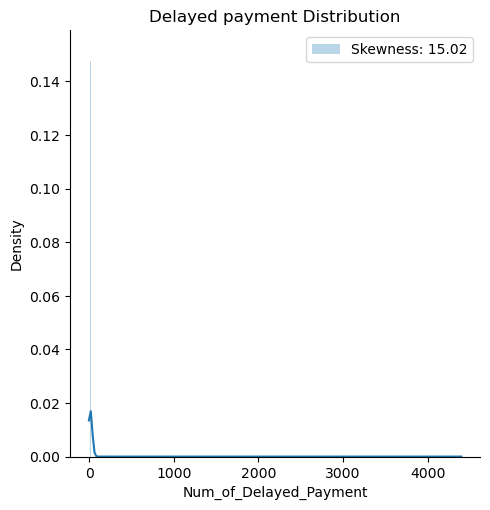

In [74]:
sns.displot(df['Num_of_Delayed_Payment'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed payment Distribution')

In [75]:
mod_payment = [np.log(pay) if pay > 0 else 0 
               for pay in df['Num_of_Delayed_Payment'] ]
df['Num_of_Delayed_Payment'] = mod_payment

Text(0.5, 1.0, 'Delayed payment Distribution')

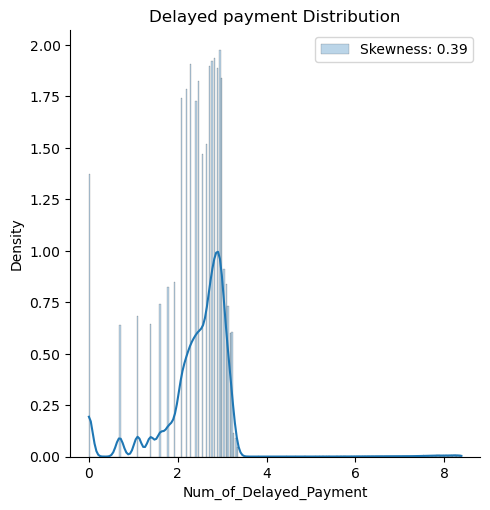

In [76]:
sns.displot(df['Num_of_Delayed_Payment'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed payment Distribution')

    Num_credit_inquiries

Text(0.5, 1.0, 'Delayed payment Distribution')

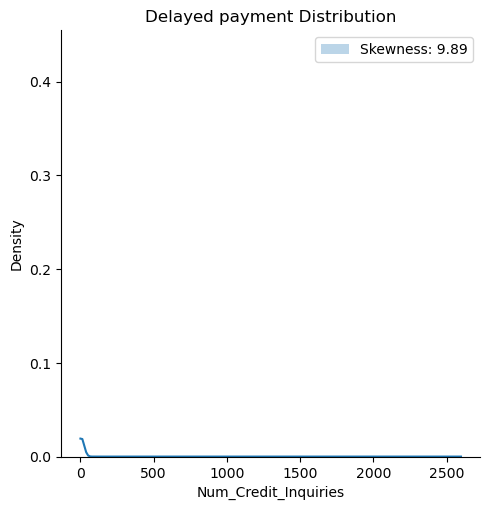

In [77]:
sns.displot(df['Num_Credit_Inquiries'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed payment Distribution')

In [78]:
modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 
                      for inquiries in df['Num_Credit_Inquiries']]
df['Num_Credit_Inquiries'] = modified_inquiries

Text(0.5, 1.0, 'Num_Credit_Inquiries Distribution')

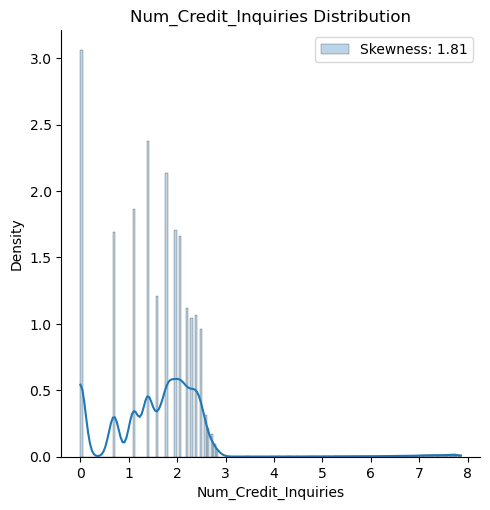

In [79]:
sns.displot(df['Num_Credit_Inquiries'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Num_Credit_Inquiries Distribution')

    Total_EMI_per_month

Text(0.5, 1.0, 'Total_EMI_per_month Distribution')

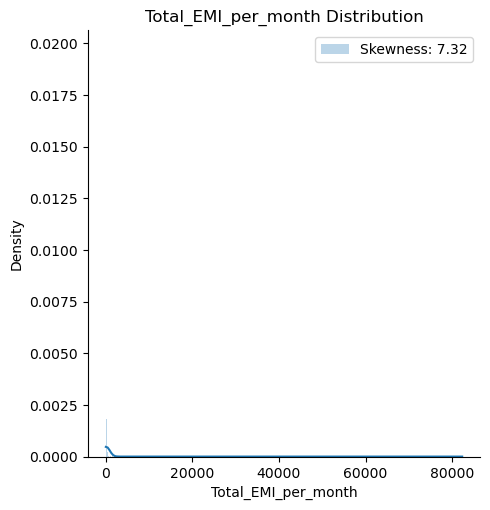

In [80]:
sns.displot(df['Total_EMI_per_month'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total_EMI_per_month Distribution')

In [81]:
mod_emi = [np.log(emi) if emi > 0 else 0 
           for emi in df['Total_EMI_per_month']]
df['Total_EMI_per_month'] = mod_emi

Text(0.5, 1.0, 'Total_EMI_per_month Distribution')

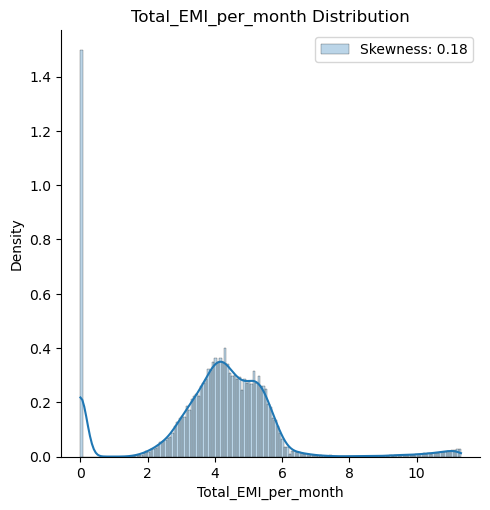

In [82]:
sns.displot(df['Total_EMI_per_month'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total_EMI_per_month Distribution')

    Amount_invested_monthly

Text(0.5, 1.0, 'Amount_invested_monthly Distribution')

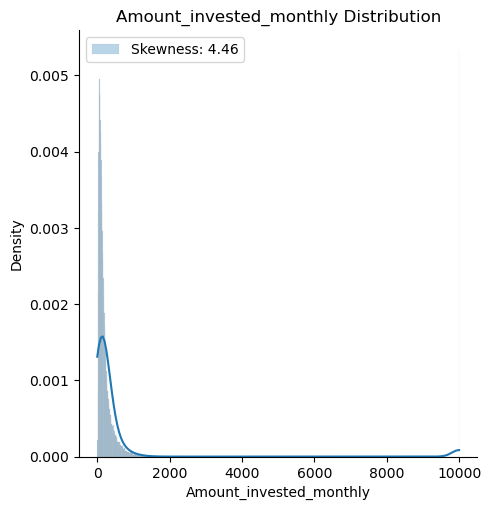

In [83]:
sns.displot(df['Amount_invested_monthly'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount_invested_monthly Distribution')

In [84]:
mod_amt = [np.log(amt) if amt > 0 else 0 
           for amt in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = mod_amt

Text(0.5, 1.0, 'Amount_invested_monthly Distribution')

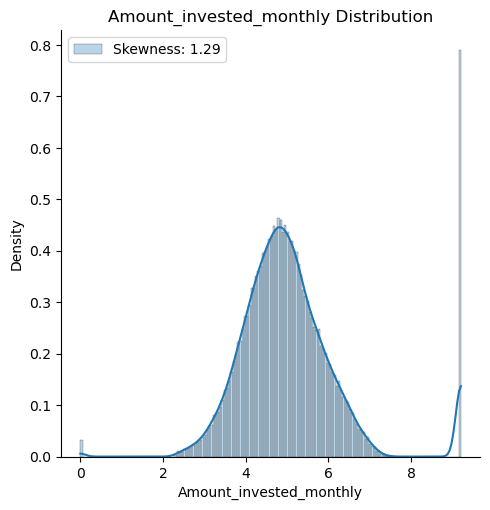

In [85]:
sns.displot(df['Amount_invested_monthly'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount_invested_monthly Distribution')

    Monthly_Balance

Text(0.5, 1.0, 'Monthly Balance monthly Distribution')

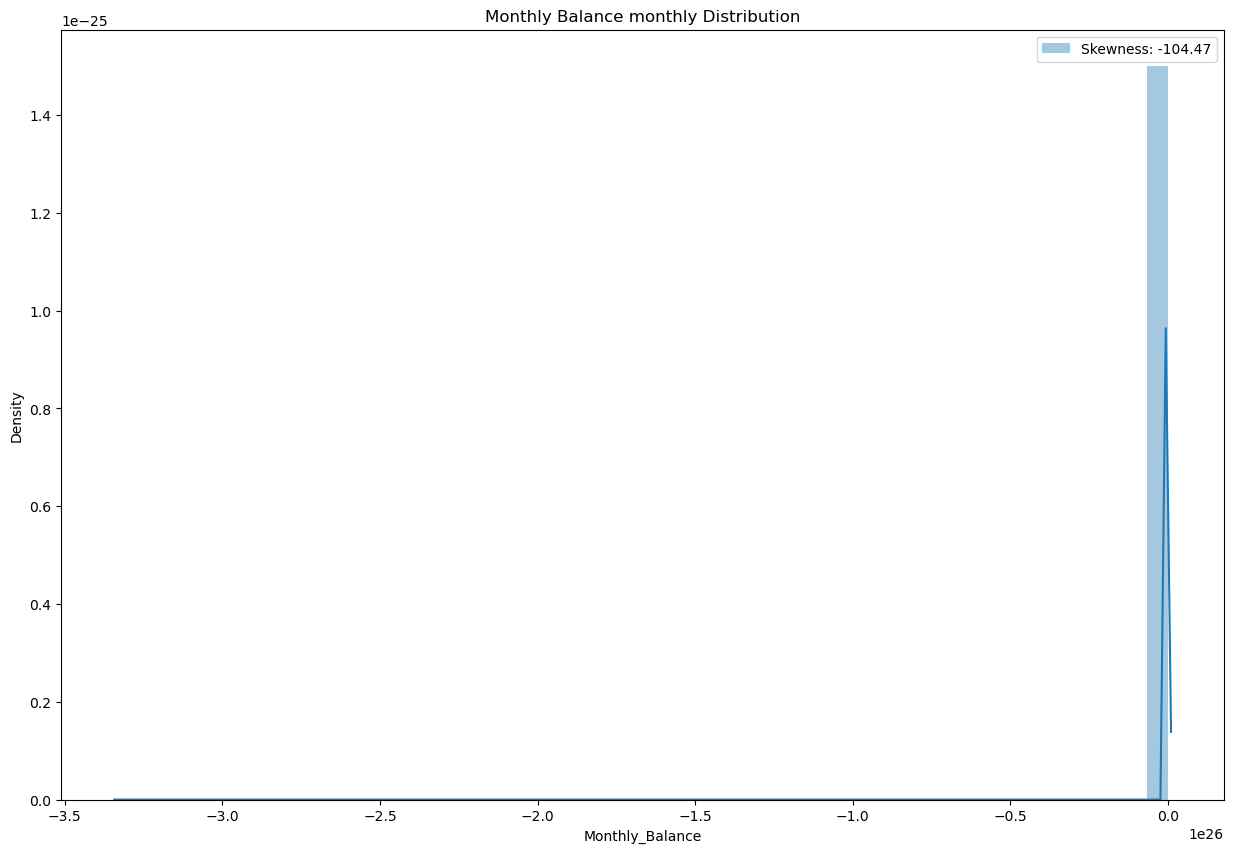

In [86]:
sns.distplot(df['Monthly_Balance'], label = 'Skewness: %.2f'%(df['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Monthly Balance monthly Distribution')

In [87]:
### Understanding the distribution of the data log(Amount_invested_monthly)

modified_monthly_income = [np.log(amount) if amount > 0 else 0 for amount in df['Monthly_Balance']]
df['Monthly_Balance'] = modified_monthly_income

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

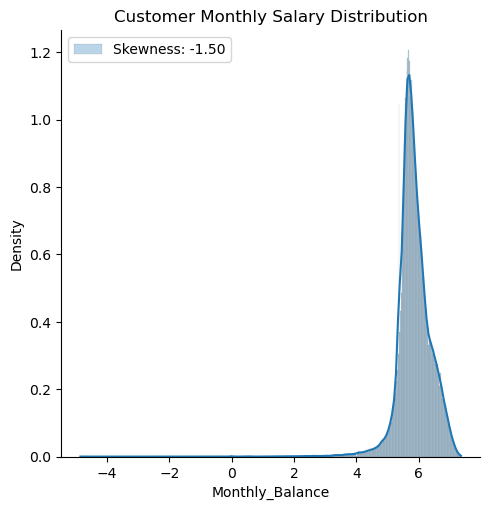

In [88]:
sns.displot(df['Monthly_Balance'], stat = "density", 
            alpha=0.3, kde = 'True', 
            label = 'Skewness: %.2f'%(df['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

In [89]:
numeric_df3 = df.select_dtypes(include=['int', 'float'])
numeric_df3.skew()

Age                          3.189539
Annual_Income                1.821152
Monthly_Inhand_Salary        1.166514
Num_Bank_Accounts           11.633358
Num_Credit_Card              8.818858
Interest_Rate                1.790818
Delay_from_due_date          0.961513
Num_of_Delayed_Payment       0.394390
Changed_Credit_Limit         0.630001
Num_Credit_Inquiries         1.809015
Outstanding_Debt             1.202688
Credit_Utilization_Ratio     0.024936
Total_EMI_per_month          0.182089
Amount_invested_monthly      1.294526
Monthly_Balance             -1.504897
Auto_Loan                    0.656370
Credit_Builder_Loan          0.583990
Personal_Loan                0.636711
Home_Enquity_Loan            0.600246
Mortgage_Loan                0.610647
Student_Loan                 0.627459
Debt_Consolidation_Loan      0.627459
Payday_Loan                  0.567841
dtype: float64

_2.4.5 Feature Encoding_

The process of converting categorical data into numerical data. It is essential because ML-algorithms can only interpret numerical data and not in text form

In [90]:
# Converting month into numerical value
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 
                               'April':4, 'May':5, 'June':6, 'July':7,
                               'August':8,'September':9, 'October':10, 
                               'November':11, 'December':12})

In [91]:
# Converting the occupation into numerical value
ord_encoder = OrdinalEncoder()
job_encoded = pd.DataFrame(ord_encoder.fit_transform(df[['Occupation']]))
job_encoded.rename(columns = {0:'Occupation'}, inplace = True)
job_encoded 

,Occupation
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0
...,...
98248,9.0
98249,9.0
98250,9.0
98251,9.0


In [92]:
# One hot encoding for minimum pay encode
min_pay_encode = pd.get_dummies(data = df['Payment_of_Min_Amount'], 
                                drop_first = True, prefix = 'pay_min_amt',
                                dtype = int)
min_pay_encode.head()

,pay_min_amt_No,pay_min_amt_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [93]:
# Merging two features
encoded_data = pd.concat([min_pay_encode, job_encoded], axis = 1)
encoded_data.reset_index(drop = True, 
                         inplace = True) #cleaner index & efficient memory
encoded_data

,pay_min_amt_No,pay_min_amt_Yes,Occupation
0,1,0,12.0
1,1,0,12.0
2,1,0,12.0
3,1,0,12.0
4,1,0,12.0
...,...,...,...
98248,1,0,9.0
98249,1,0,9.0
98250,1,0,9.0
98251,1,0,9.0


In [94]:
# Drop values of occupation and min amt

df.drop(columns = ['Occupation', 'Payment_of_Min_Amount', 'Credit_History_Age'], 
        axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

In [95]:
# Merge encoded_data with old df
new_df = pd.concat([df, encoded_data], axis = 1)

In [96]:
# Encoding payment behaviour
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].map({'Low_spent_Small_value_payments':0,
                                                         'Low_spent_Medium_value_payments':1,
                                                         'Low_spent_Large_value_payments':2,
                                                         'High_spent_Small_value_payments':3,
                                                         'High_spent_Medium_value_payments':4,
                                                         'High_spent_Large_value_payments':5})

In [97]:
# Encoding credit mix
new_df['Credit_Mix'] = new_df['Credit_Mix'].replace({'Bad': 0,
                                                      'Standard' : 1, 
                                                      'Good':2})

In [99]:
# Encoding credit score column

credit_score_data = new_df['Credit_Score']
target = []

for value in credit_score_data :
    if value == 'Good':
        target.append(2)
    elif value == 'Standard':
        target.append(1)
    else :
        target.append(0)

# Remove the credit score column
new_df.drop(['Credit_Score'], axis = 1, inplace = True)

# Add target column
new_df['Target'] = target

In [100]:
new_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,pay_min_amt_No,pay_min_amt_Yes,Occupation,Target
0,1,3.135494,9.858183,1824,3,4,1.098612,3,1.945910,11.27,1.386294,2,809.98,26.822620,3.903486,4.387204,3,5.744586,1,1,1,1,0,0,0,0,1,0,12.0,2
1,2,3.135494,9.858183,5197,3,4,1.098612,-1,1.945910,11.27,1.386294,2,809.98,31.944960,3.903486,4.773057,2,5.651187,1,1,1,1,0,0,0,0,1,0,12.0,2
2,3,0.000000,9.858183,5197,3,4,1.098612,3,1.945910,11.27,1.386294,2,809.98,28.609352,3.903486,4.403048,1,5.802752,1,1,1,1,0,0,0,0,1,0,12.0,2
3,4,3.135494,9.858183,5197,3,4,1.098612,5,1.386294,6.27,1.386294,2,809.98,31.377862,3.903486,5.295604,0,5.409194,1,1,1,1,0,0,0,0,1,0,12.0,2
4,5,3.135494,9.858183,1824,3,4,1.098612,6,1.386294,11.27,1.386294,2,809.98,24.797347,3.903486,3.723768,4,5.833316,1,1,1,1,0,0,0,0,1,0,12.0,2
